In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

### 各种非线性激活：
- ReLU及其各种变体
- sigmoid和tanh等

以上都是逐元素进行计算

In [11]:
##>1. ELU激活
x=np.linspace(-5,5,1000)
x=torch.tensor(x)
m=torch.nn.ELU()
y=m(x)

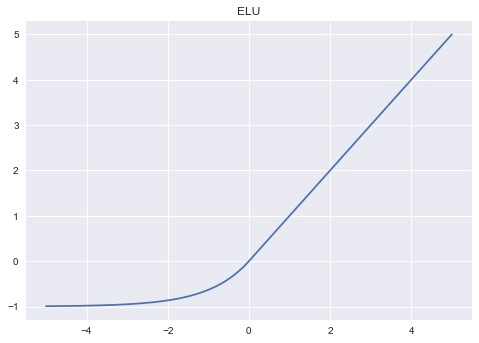

In [15]:
import seaborn as sns;sns.set()
plt.title('ELU');
plt.plot(x.numpy(),y.numpy());

$ ELU(x)=max(0,x)+min(0,α∗(exp(x)−1)) $

相比ReLU，在小于0的部分，变为 $ e^{x-1} $，即[-1,0]之间的指数函数

默认$\alpha$为1

In [27]:
X=torch.randn(3,4)
X

tensor([[ 0.5367, -1.2528,  0.7580,  0.3295],
        [-1.5422,  2.0223,  0.1130,  0.0243],
        [ 1.1289,  1.8300,  0.1238,  1.4848]])

In [29]:
##对于多维数据来说，是逐元素进行处理
##下面只画出图像，不再示例多维数据
m=torch.nn.ELU()
m(X)

tensor([[ 0.5367, -0.7143,  0.7580,  0.3295],
        [-0.7861,  2.0223,  0.1130,  0.0243],
        [ 1.1289,  1.8300,  0.1238,  1.4848]])

In [56]:
def plot_activationFunc(x,y,title=''):
    if title != '':
        plt.title(title)
    
    if type(x)==torch.Tensor and type(y)==torch.Tensor:
        plt.plot(x.numpy(),y.numpy());
    else:
        plt.plot(x,y);

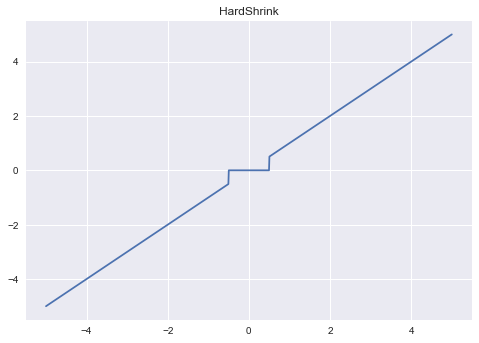

In [17]:
##>2. HardShrink
m=torch.nn.Hardshrink()
plot_activationFunc(x,m(x),'HardShrink')

在 0 的某个$[-\lambda,\lambda]$区间内，输出为0；其他区间输出为x

默认$\lambda$为0.5

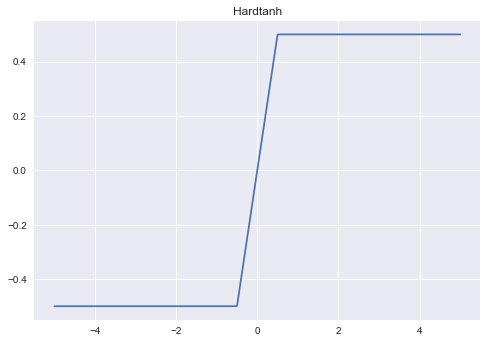

In [21]:
##>3. HardTanh
var={'min_val':-0.5,'max_val':0.5}
m=torch.nn.Hardtanh(**var)
plot_activationFunc(x,m(x),'Hardtanh')

- $x>max\_val,则x=max\_val$

- $x<min\_val,则x=min\_val$

- 在两者之间时，输出为x自身

默认min_val，max_val为-1和1

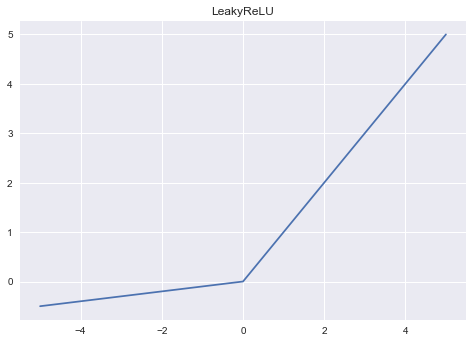

In [26]:
##>4. LeakyReLU
m=torch.nn.LeakyReLU(0.1)
plot_activationFunc(x,m(x),'LeakyReLU')

- $x>0时，y=x$

- $x<0时，y=-slope*(x). 默认slope为0.01$

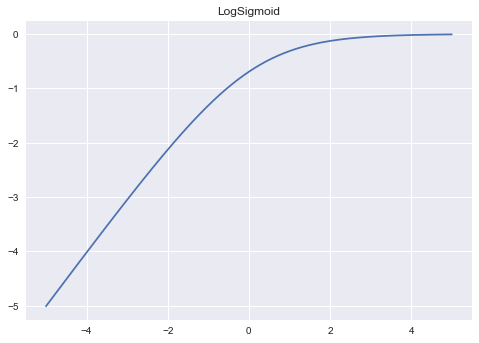

In [30]:
##>5. LogSigmoid
m=torch.nn.LogSigmoid()
plot_activationFunc(x,m(x),'LogSigmoid')

$LogSigmoid=log(\frac{1}{1+exp(-x)})$

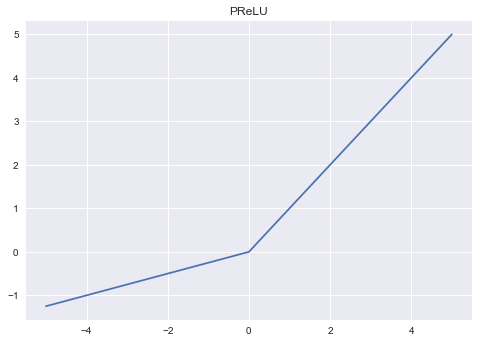

In [87]:
##>6. PReLUm=torch.nn.PReLU()
x=x.to(torch.float)
y=m(x)
plot_activationFunc(x,y.data,'PReLU')

$PReLU(x)=max(0,x)+a∗min(0,x) $
即：
- y=x,如果$x\ge0$
- y=ax，如果x<0

a是个可学习的参数，可根据不同的通道数n，设置n个a，默认不设置，即只有1个参数

详见:https://pytorch.org/docs/stable/nn.html#torch.nn.PReLU

In [88]:
##>7. ReLu
##这个不用说了

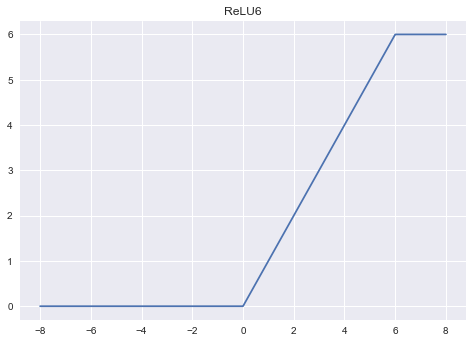

In [89]:
##>8. ReLu6
m=nn.ReLU6()
x8=torch.linspace(-8,8,1000)
y=m(x8)
plot_activationFunc(x8,y,'ReLU6')

$ReLU6(x)=min(max(0,x),6)$

即到6之后，y=6

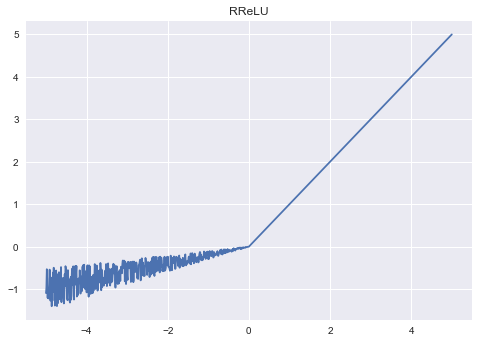

In [91]:
##>9. RReLu
m=nn.RReLU(0.1,0.3)
y=m(x)
plot_activationFunc(x,y,'RReLU')

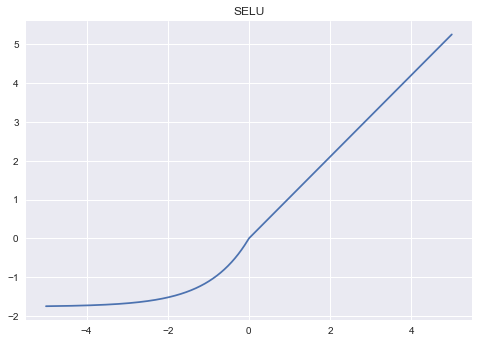

In [92]:
##>10. SELU
m=nn.SELU()
y=m(x)
plot_activationFunc(x,y,'SELU')

In [93]:
##>11. sigmoid

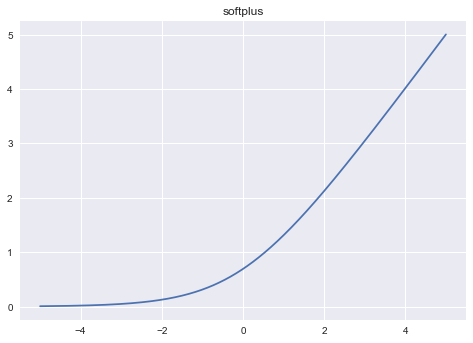

In [94]:
##>12. softplus
m=nn.Softplus()
y=m(x)
plot_activationFunc(x,y,'softplus')

$Softplus(x)=\frac{1}{β}∗log(1+exp(β∗x))$

平滑版的ReLU，$\beta$默认为1

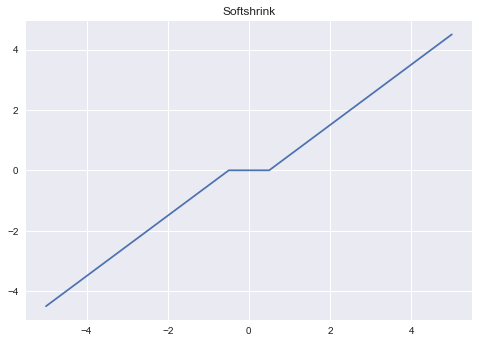

In [95]:
##>13. softshrink
m=nn.Softshrink()
y=m(x)
plot_activationFunc(x,y,'Softshrink')

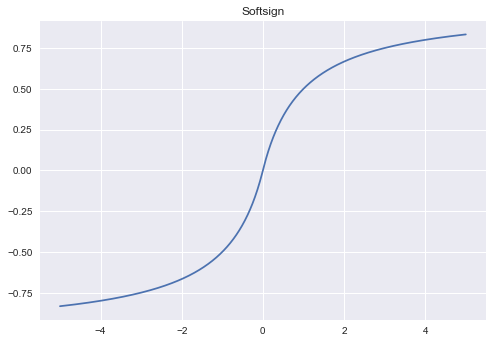

In [96]:
##>14. softsign
m=nn.Softsign()
y=m(x)
plot_activationFunc(x,y,'Softsign')

In [97]:
##>15. tanh

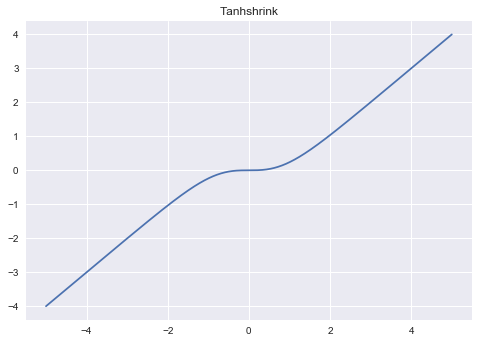

In [98]:
##>16. tanhshrink
m=nn.Tanhshrink()
y=m(x)
plot_activationFunc(x,y,'Tanhshrink')

$Tanhshrink(x)=x−Tanh(x)$

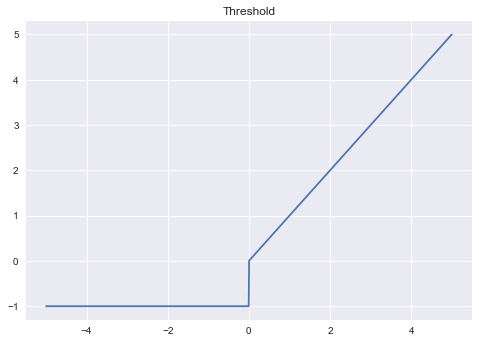

In [101]:
##>17. threshold
m=nn.Threshold(0,-1)
y=m(x)
plot_activationFunc(x,y,'Threshold')

In [124]:
##>18. softmin
m=nn.Softmin(dim=0)
x18=torch.arange(6,dtype=torch.float).reshape(2,3)
x18

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [126]:
m(x18)

tensor([[-0.0474, -0.0474, -0.0474],
        [-0.9526, -0.9526, -0.9526]])

In [128]:
m(x18)[:,0].sum()

tensor(-1.)

In [116]:
##>19. softmax
m=nn.Softmax(dim=1)
x19=x18
m(x19)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [121]:
m(x19)[0,:].sum()

tensor(1.)

In [120]:
1/(1+np.exp(1)+np.exp(2))

0.09003057317038046

In [119]:
np.exp(3)/(np.exp(3)+np.exp(4)+np.exp(5))

0.09003057317038046

In [135]:
##>20. softmax2d
m=nn.Softmax2d()
x20=torch.arange(32,dtype=torch.float).reshape(1,2,4,4)
x20

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[16., 17., 18., 19.],
          [20., 21., 22., 23.],
          [24., 25., 26., 27.],
          [28., 29., 30., 31.]]]])

In [142]:
m(x20).round()

tensor([[[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

In [138]:
x20_=torch.randn(1,2,4,4)
x20_

tensor([[[[ 0.9228, -0.4082, -0.3253, -0.9101],
          [ 1.1686,  0.8872, -0.8469, -0.3280],
          [-1.3519, -0.2562, -1.3317,  1.1524],
          [ 1.6256,  0.5180,  1.2261, -0.5437]],

         [[ 0.2784, -0.8981, -0.1485,  1.3678],
          [-0.6258,  0.0396, -1.0121, -0.6792],
          [-0.2393, -1.1362,  0.3776,  1.5735],
          [ 0.7650, -0.8292,  1.7297, -0.2230]]]])

In [139]:
m(x20_)

tensor([[[[0.6558, 0.6201, 0.4559, 0.0930],
          [0.8575, 0.7001, 0.5412, 0.5869],
          [0.2474, 0.7068, 0.1533, 0.3963],
          [0.7028, 0.7937, 0.3767, 0.4205]],

         [[0.3442, 0.3799, 0.5441, 0.9070],
          [0.1425, 0.2999, 0.4588, 0.4131],
          [0.7526, 0.2932, 0.8467, 0.6037],
          [0.2972, 0.2063, 0.6233, 0.5795]]]])

In [147]:
m(x20_)[0,0,:,:]+m(x20_)[0,1,:,:]

tensor([[1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000]])

### 这个函数是对不同通道同一位置的数据做softmax, 使得它们的和为1

In [150]:
##>21 LogSoftmax
m=nn.LogSoftmax(dim=1)
x21=torch.arange(3,dtype=torch.float).reshape(1,3)
m(x21)

tensor([[-2.4076, -1.4076, -0.4076]])

In [ ]:
##>22. AdaptiveLogSoftmaxWithLoss
##是一种对于有较大输出空间模型的softmax的近似
##详见：https://pytorch.org/docs/stable/nn.html#torch.nn.AdaptiveLogSoftmaxWithLoss